# 时间日志分析

## 读取数据
分析并读取数据

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib.pylab import mpl

mpl.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

In [3]:
def _date_parser(dstr):
    return pd.Timestamp(dstr).date()
data = pd.read_csv('dida365.csv',header=3,index_col='Due Date',parse_dates=True,date_parser=_date_parser)
data.head()

,List Name,Title,Content,Is Checklist,Reminder,Repeat,Priority,Status,Completed Time,Order,Timezone,Is All Day
Due Date,,,,,,,,,,,,
2016-05-24,自我成长,[编程] javascript exercism [1h],NaN,N,NaN,NaN,0,2,2016-05-25T14:15:10+0000,-235295488344064,Asia/Shanghai,True
2016-05-23,自我成长,[编程] javascript exercism [0.5h],NaN,N,NaN,NaN,0,2,2016-05-24T15:59:08+0000,-234195976716288,Asia/Shanghai,True
2016-05-23,自我成长,[编程] clojure ring request [2h],阅读 ring.util.request 源码\r,N,NaN,NaN,0,2,2016-05-24T15:58:56+0000,-233096465088512,Asia/Shanghai,True
2016-05-22,自我成长,[编程] clojure ring 入门 [30m],NaN,N,NaN,NaN,0,2,2016-05-23T15:03:24+0000,-231996953460736,Asia/Shanghai,True
2016-05-22,自我成长,[探索发现] 体验 iMac 开发环境 [3h],iMac 的屏幕体验很棒，但使用非SSD硬盘速度上和mpb想着非常多。\r,N,NaN,NaN,0,2,2016-05-23T14:33:35+0000,-230897441832960,Asia/Shanghai,True


## 数据清洗
* 只关心己完成或己达成的事件，即 `status != 0` 的事件
* 只需要 `List Name` 和 `Title` 字段


In [4]:
df = data[data['Status'] != 0].loc[:,['List Name','Title']]
df.head()

,List Name,Title
Due Date,,
2016-05-24,自我成长,[编程] javascript exercism [1h]
2016-05-23,自我成长,[编程] javascript exercism [0.5h]
2016-05-23,自我成长,[编程] clojure ring request [2h]
2016-05-22,自我成长,[编程] clojure ring 入门 [30m]
2016-05-22,自我成长,[探索发现] 体验 iMac 开发环境 [3h]


## 数据解析
解析事件类别和和花费的时间

In [5]:
import re
def parse_tag(value):
    m = re.match(r'^\[(.*)].*]$', value)
    if m and m.group(1):
        return m.group(1)
    else:
        return 'other'

def parse_duration(value):
    m = re.match(r'^\[.*].*\[(\d{1,2})([hm])]$',value)
    if m:
        dur = 0
        try:
            dur = float(m.group(1))
        except Exception as e:
            print('parse duration error: \n%s' % e)
        if m.group(2) == 'm':
            fur = dur /60.0
        return dur
    else:
        return 0

titles = df['Title']
df['Tag'] = titles.map(parse_tag)
df['Duration'] = titles.map(parse_duration)
df.head()

,List Name,Title,Tag,Duration
Due Date,,,,
2016-05-24,自我成长,[编程] javascript exercism [1h],编程,1.0
2016-05-23,自我成长,[编程] javascript exercism [0.5h],编程,0.0
2016-05-23,自我成长,[编程] clojure ring request [2h],编程,2.0
2016-05-22,自我成长,[编程] clojure ring 入门 [30m],编程,30.0
2016-05-22,自我成长,[探索发现] 体验 iMac 开发环境 [3h],探索发现,3.0


In [6]:
df.count()

List Name    232
Title        232
Tag          232
Duration     232
dtype: int64

In [7]:
start_date = df.index.min().date()
start_date

datetime.date(2015, 12, 2)

In [8]:
end_date = df.index.max().date()
end_date

datetime.date(2016, 5, 24)

## 数据分析

#### 时间总览
平均每天投资在自己身上的时间是多少？-> *全部时间 / 总天数*

In [9]:
end_date - start_date

datetime.timedelta(days=174)

In [10]:
df['Duration'].sum()

700.0

In [11]:
df['Duration'].sum() / (end_date - start_date).days

4.022988505747127

#### 精力分配

In [12]:
tag_list = df.groupby('Tag').sum()
tag_list

,Duration
Tag,
写作,42.0
探索发现,84.0
机器学习,23.0
电影,49.0
编程,333.0
阅读,169.0


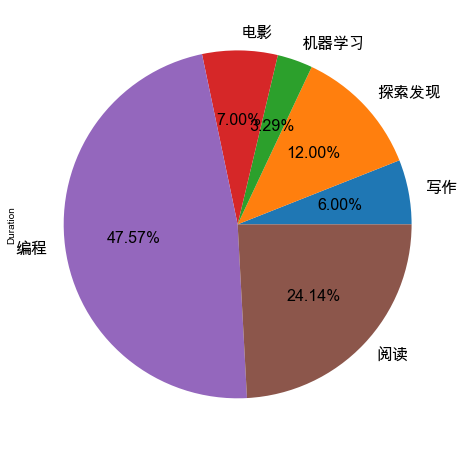

In [13]:
tag_list['Duration'].plot(kind='pie',figsize=(8,8),fontsize=16,autopct='%.2f%%')

## 专注力
长时间学习某项技能的能力

In [14]:
programming = df[df['Tag'] == '编程']
programming.head()


,List Name,Title,Tag,Duration
Due Date,,,,
2016-05-24,自我成长,[编程] javascript exercism [1h],编程,1.0
2016-05-23,自我成长,[编程] javascript exercism [0.5h],编程,0.0
2016-05-23,自我成长,[编程] clojure ring request [2h],编程,2.0
2016-05-22,自我成长,[编程] clojure ring 入门 [30m],编程,30.0
2016-05-22,自我成长,[编程] javascript exercism [0.5h],编程,0.0


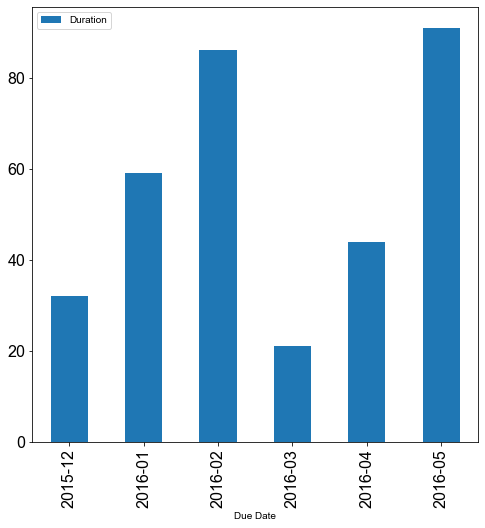

In [15]:
programming.resample('m').sum().to_period(freq='m').plot(kind='bar', figsize=(8, 8), fontsize=16)

In [16]:
programming.resample('m').sum().to_period(freq='A-DEC')

,Duration
Due Date,
2015,32.0
2016,59.0
2016,86.0
2016,21.0
2016,44.0
2016,91.0


#### 连续时间的精力分配

以时间为横轴，查看精力分配。

In [17]:
# 为什么不直接使用 df.pivot()? 因为有重复的行索引，如 2016-05-23
date_tags = df.reset_index().groupby(['Due Date', 'Tag']).sum()
date_tags



Duration
Due Date   Tag           
2015-12-02 写作         3.0
2015-12-04 阅读         3.0
2015-12-06 写作         4.0
           机器学习       3.0
2015-12-07 写作         1.0
...                   ...
2016-05-20 编程         4.0
2016-05-22 探索发现       3.0
           编程        30.0
2016-05-23 编程         2.0
2016-05-24 编程         1.0

[187 rows x 1 columns]

In [18]:
# 以 tag 作为列索引
dates = date_tags.reset_index().pivot(index='Due Date',columns='Tag',values='Duration')
dates

Tag,写作,探索发现,机器学习,电影,编程,阅读
Due Date,,,,,,
2015-12-02,3.0,NaN,NaN,NaN,NaN,NaN
2015-12-04,NaN,NaN,NaN,NaN,NaN,3.0
2015-12-06,4.0,NaN,3.0,NaN,NaN,NaN
2015-12-07,1.0,NaN,NaN,NaN,NaN,NaN
2015-12-08,NaN,NaN,1.0,NaN,4.0,NaN
...,...,...,...,...,...,...
2016-05-19,NaN,NaN,NaN,NaN,1.0,NaN
2016-05-20,NaN,NaN,NaN,NaN,4.0,NaN
2016-05-22,NaN,3.0,NaN,NaN,30.0,NaN


In [19]:
# 补足连续时间，可以看到哪些天没有在学习
full_dates = dates.reindex(pd.date_range(start_date, end_date)).fillna(0)
full_dates

Tag,写作,探索发现,机器学习,电影,编程,阅读
2015-12-02,3.0,0.0,0.0,0.0,0.0,0.0
2015-12-03,0.0,0.0,0.0,0.0,0.0,0.0
2015-12-04,0.0,0.0,0.0,0.0,0.0,3.0
2015-12-05,0.0,0.0,0.0,0.0,0.0,0.0
2015-12-06,4.0,0.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2016-05-20,0.0,0.0,0.0,0.0,4.0,0.0
2016-05-21,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-22,0.0,3.0,0.0,0.0,30.0,0.0
2016-05-23,0.0,0.0,0.0,0.0,2.0,0.0


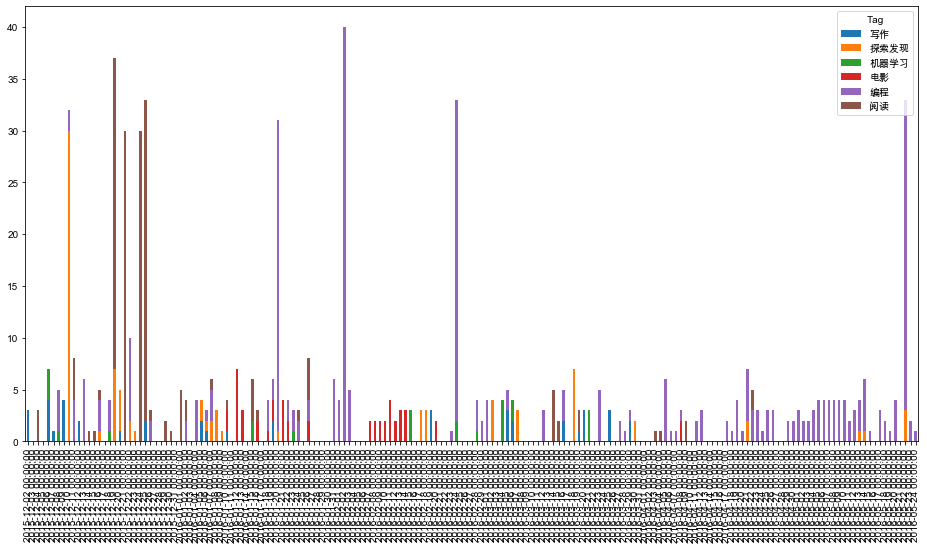

In [20]:
# 画出柱状图
full_dates.plot(kind='bar', stacked=True, figsize=(16, 8))


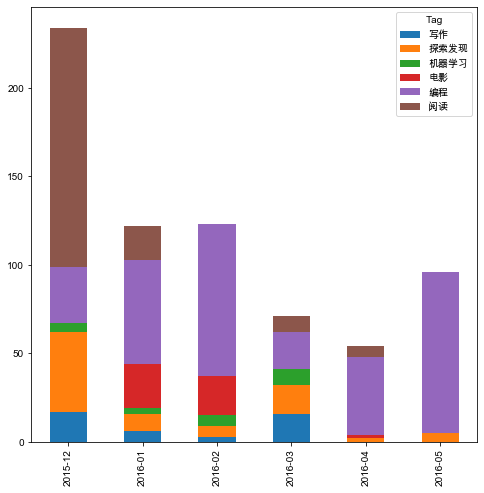

In [22]:
full_dates.resample('m').sum().to_period('m').plot(kind='bar', stacked=True, figsize=(8, 8))


Tag,写作,探索发现,机器学习,电影,编程,阅读
2015-12,17.0,45.0,5.0,0.0,32.0,135.0
2016-01,6.0,10.0,3.0,25.0,59.0,19.0
2016-02,3.0,6.0,6.0,22.0,86.0,0.0
2016-03,16.0,16.0,9.0,0.0,21.0,9.0
2016-04,0.0,2.0,0.0,2.0,44.0,6.0
2016-05,0.0,5.0,0.0,0.0,91.0,0.0
